In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/Julian/Downloads/empresa_datos_grande.csv")
df

,ID_cliente,Edad,Genero,Ingresos,Ciudad,Fecha_registro,Categoría_producto,Monto_gastado,Interacciones_soporte,Satisfacción_cliente,Estado_cliente
0,1,55,M,32080,Medellín,2019-01-01,Deportes,813,0,4,Activo
1,2,42,F,100875,Cartagena,2019-01-02,Deportes,2074,3,5,Inactivo
2,3,60,F,76214,Medellín,2019-01-03,Ropa,1692,2,10,Activo
3,4,54,F,96495,Barranquilla,2019-01-04,Alimentos,1654,5,10,Activo
4,5,65,F,46527,Bogotá,2019-01-05,Electrónica,610,2,7,Inactivo
...,...,...,...,...,...,...,...,...,...,...,...
495,496,48,F,83884,Bogotá,2020-05-10,Electrónica,2226,9,6,Activo
496,497,64,M,85898,Cali,2020-05-11,Hogar,3733,6,4,Activo
497,498,57,F,104666,Barranquilla,2020-05-12,Hogar,1705,1,4,Inactivo
498,499,37,F,41351,Cartagena,2020-05-13,Electrónica,807,3,10,Inactivo


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_cliente             500 non-null    int64 
 1   Edad                   500 non-null    int64 
 2   Genero                 500 non-null    object
 3   Ingresos               500 non-null    int64 
 4   Ciudad                 500 non-null    object
 5   Fecha_registro         500 non-null    object
 6   Categoría_producto     500 non-null    object
 7   Monto_gastado          500 non-null    int64 
 8   Interacciones_soporte  500 non-null    int64 
 9   Satisfacción_cliente   500 non-null    int64 
 10  Estado_cliente         500 non-null    object
dtypes: int64(6), object(5)
memory usage: 43.1+ KB


In [223]:
df.describe()

,ID_cliente,Edad,Ingresos,Monto_gastado,Interacciones_soporte,Satisfacción_cliente
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,43.186000,71953.526000,2797.666000,4.376000,5.628000
std,144.481833,15.250198,25662.924999,1356.730228,2.878053,2.893157
min,1.000000,18.000000,30122.000000,514.000000,0.000000,1.000000
25%,125.750000,30.000000,49554.000000,1695.000000,2.000000,3.000000
50%,250.500000,43.000000,69691.500000,2832.500000,4.500000,5.500000
75%,375.250000,57.000000,93154.000000,4036.250000,7.000000,8.000000
max,500.000000,69.000000,119849.000000,4987.000000,9.000000,10.000000


### 1. Distribución Demográfica

In [199]:
edades_clientes = df.groupby("Edad")["Edad"].count()
edades_clientes.sort_values(ascending = False)

Edad
46    18
58    17
57    15
54    13
27    13
31    13
34    13
69    12
33    12
20    12
23    12
28    12
40    12
19    11
41    11
18    11
26    10
35    10
68    10
39    10
22    10
21    10
65    10
64    10
59     9
53     9
49     9
56     9
45     9
66     9
37     9
36     9
63     8
62     8
55     8
67     8
32     8
44     8
51     8
48     8
42     8
24     7
60     7
61     7
43     7
29     7
52     7
50     6
25     6
30     6
38     5
47     4
Name: Edad, dtype: int64

In [201]:
promedio_edad = df["Edad"].mean()
promedio_edad

43.186

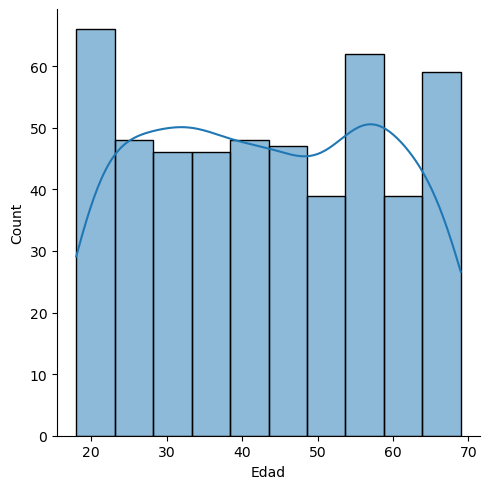

In [221]:
sns.displot(data=df,x=df["Edad"], kde= True);

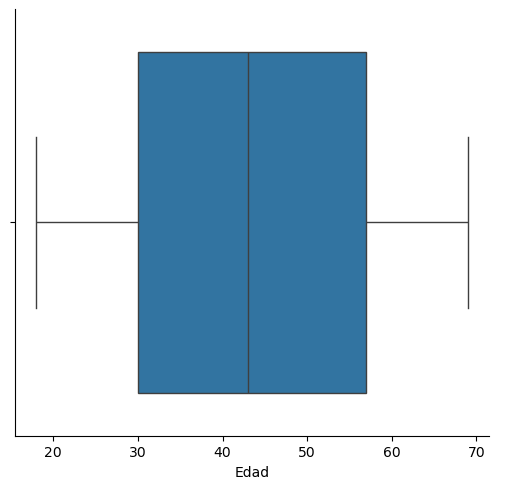

In [231]:
sns.catplot(data=df,kind="box",x=df["Edad"]);

In [50]:
proporcion = df.groupby("Genero")["Genero"].count()
proporcion / len(df) * 100

Genero
F    55.2
M    44.8
Name: Genero, dtype: float64

### 2. Ingresos y gastos

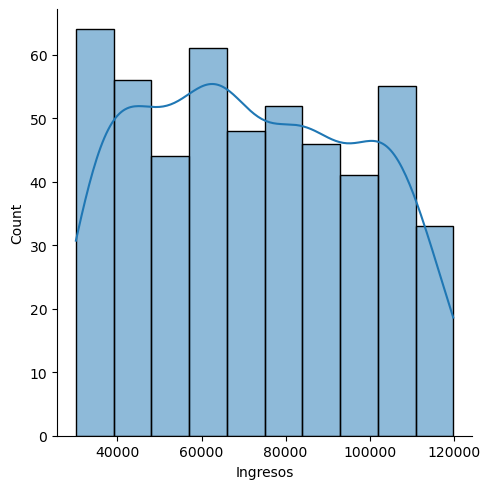

In [219]:
sns.displot(data=df,x=df["Ingresos"], kde = True);

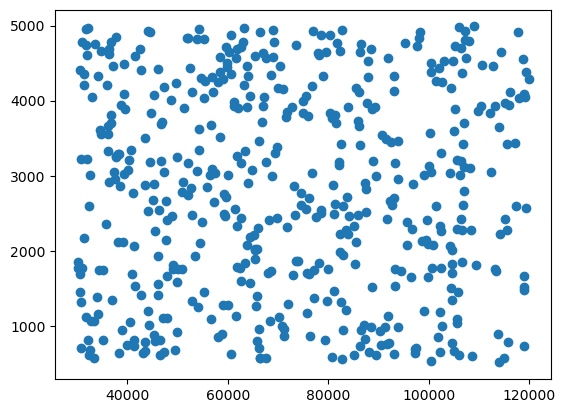

In [64]:
plt.scatter(x=df["Ingresos"],y=df["Monto_gastado"]);

In [233]:
correlacion = df["Ingresos"].corr(df["Monto_gastado"])
print(correlacion)

-0.0012678909668683766


### 3. Preferencias de productos

In [77]:
categoria_compra = df.groupby("Categoría_producto")["Monto_gastado"].sum()
categoria_compra.sort_values(ascending = False)

Categoría_producto
Alimentos      343263
Electrónica    295361
Ropa           267777
Hogar          260426
Deportes       232006
Name: Monto_gastado, dtype: int64

<Axes: xlabel='Categoría_producto'>

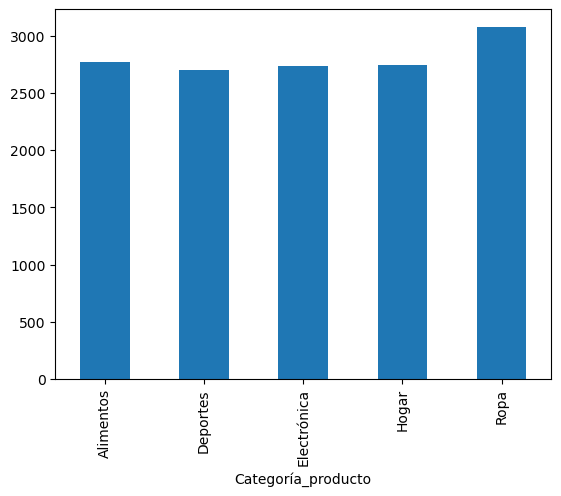

In [235]:
categoria_compra.plot(kind='bar')

In [89]:
categoria_promedio = df.groupby("Categoría_producto")["Monto_gastado"].mean()
categoria_promedio.sort_values(ascending = False)

Categoría_producto
Ropa           3077.896552
Alimentos      2768.250000
Hogar          2741.326316
Electrónica    2734.824074
Deportes       2697.744186
Name: Monto_gastado, dtype: float64

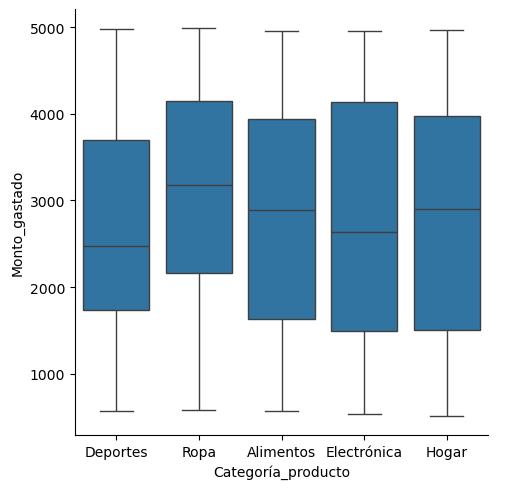

In [95]:
sns.catplot(data=df,kind="box",x=df["Categoría_producto"], y="Monto_gastado");

In [85]:
distribucion_categoria = df.groupby("Categoría_producto")["Categoría_producto"].count()
distribucion_categoria.sort_values(ascending = False)

Categoría_producto
Alimentos      124
Electrónica    108
Hogar           95
Ropa            87
Deportes        86
Name: Categoría_producto, dtype: int64

### 4. Satisfacción y Soporte

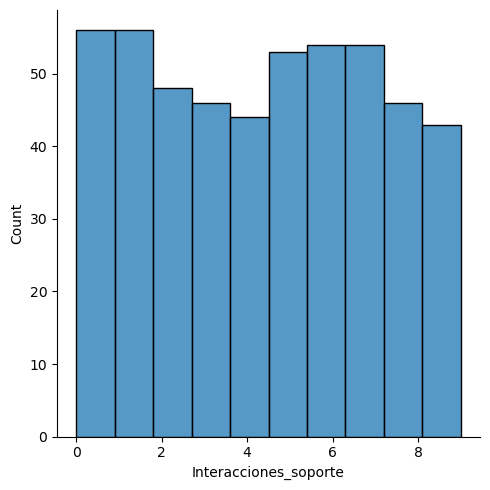

In [99]:
sns.displot(data=df,x=df["Interacciones_soporte"]);

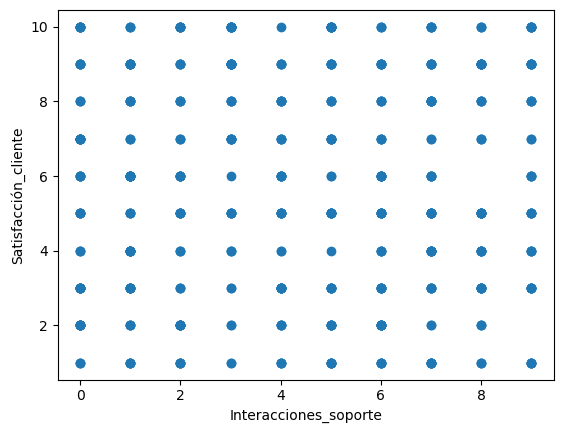

In [103]:
plt.scatter(x=df["Interacciones_soporte"],y=df["Satisfacción_cliente"])
plt.xlabel("Interacciones_soporte")
plt.ylabel("Satisfacción_cliente");

### 5. Geografía y Ciudad

In [109]:
clientes_por_ciudad = df.groupby("Ciudad")["ID_cliente"].count()
clientes_por_ciudad.sort_values(ascending = False)

Ciudad
Cartagena       113
Bogotá          107
Medellín        106
Cali             90
Barranquilla     84
Name: ID_cliente, dtype: int64

In [143]:
gasto_por_ciudad = df.groupby("Ciudad")["Monto_gastado"].mean()
gasto_por_ciudad.sort_values(ascending = False)

Ciudad
Barranquilla    2996.154762
Bogotá          2843.252336
Cartagena       2758.150442
Medellín        2713.462264
Cali            2707.000000
Name: Monto_gastado, dtype: float64

In [145]:
gasto_por_ciudad = df.groupby("Ciudad")["Satisfacción_cliente"].mean()
gasto_por_ciudad.sort_values(ascending = False)

Ciudad
Cali            5.822222
Medellín        5.764151
Cartagena       5.699115
Bogotá          5.476636
Barranquilla    5.345238
Name: Satisfacción_cliente, dtype: float64

<Axes: xlabel='Ciudad'>

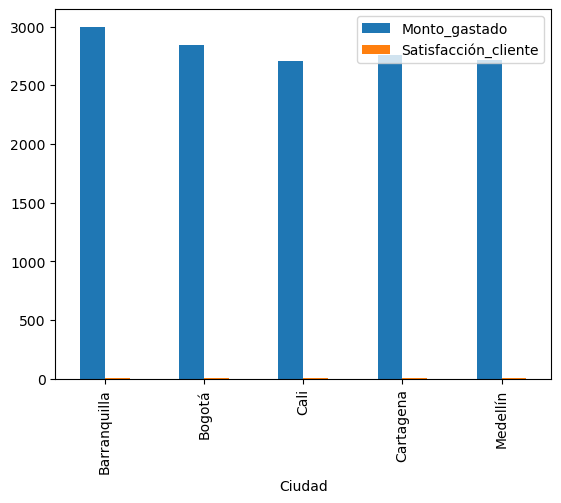

In [237]:
df.groupby("Ciudad")[["Monto_gastado", "Satisfacción_cliente"]].mean().plot(kind='bar')

### 6. Estado del Cliente

In [152]:
estado_clientes = df.groupby("Estado_cliente")["Estado_cliente"].count()
estado_clientes / len(df) * 100

Estado_cliente
Activo      51.4
Inactivo    48.6
Name: Estado_cliente, dtype: float64

In [160]:
df_inactivos = df[df["Estado_cliente"] == "Inactivo"]
df_inactivos

,ID_cliente,Edad,Genero,Ingresos,Ciudad,Fecha_registro,Categoría_producto,Monto_gastado,Interacciones_soporte,Satisfacción_cliente,Estado_cliente
1,2,42,F,100875,Cartagena,2019-01-02,Deportes,2074,3,5,Inactivo
4,5,65,F,46527,Bogotá,2019-01-05,Electrónica,610,2,7,Inactivo
6,7,52,F,105023,Medellín,2019-01-07,Deportes,668,6,6,Inactivo
9,10,64,F,44052,Bogotá,2019-01-10,Alimentos,1199,2,3,Inactivo
11,12,66,F,34153,Cali,2019-01-12,Deportes,1156,8,7,Inactivo
...,...,...,...,...,...,...,...,...,...,...,...
485,486,56,M,83407,Barranquilla,2020-04-30,Deportes,2281,6,7,Inactivo
491,492,28,M,82483,Cartagena,2020-05-06,Electrónica,3427,3,9,Inactivo
494,495,24,F,45212,Barranquilla,2020-05-09,Hogar,4076,6,1,Inactivo
497,498,57,F,104666,Barranquilla,2020-05-12,Hogar,1705,1,4,Inactivo


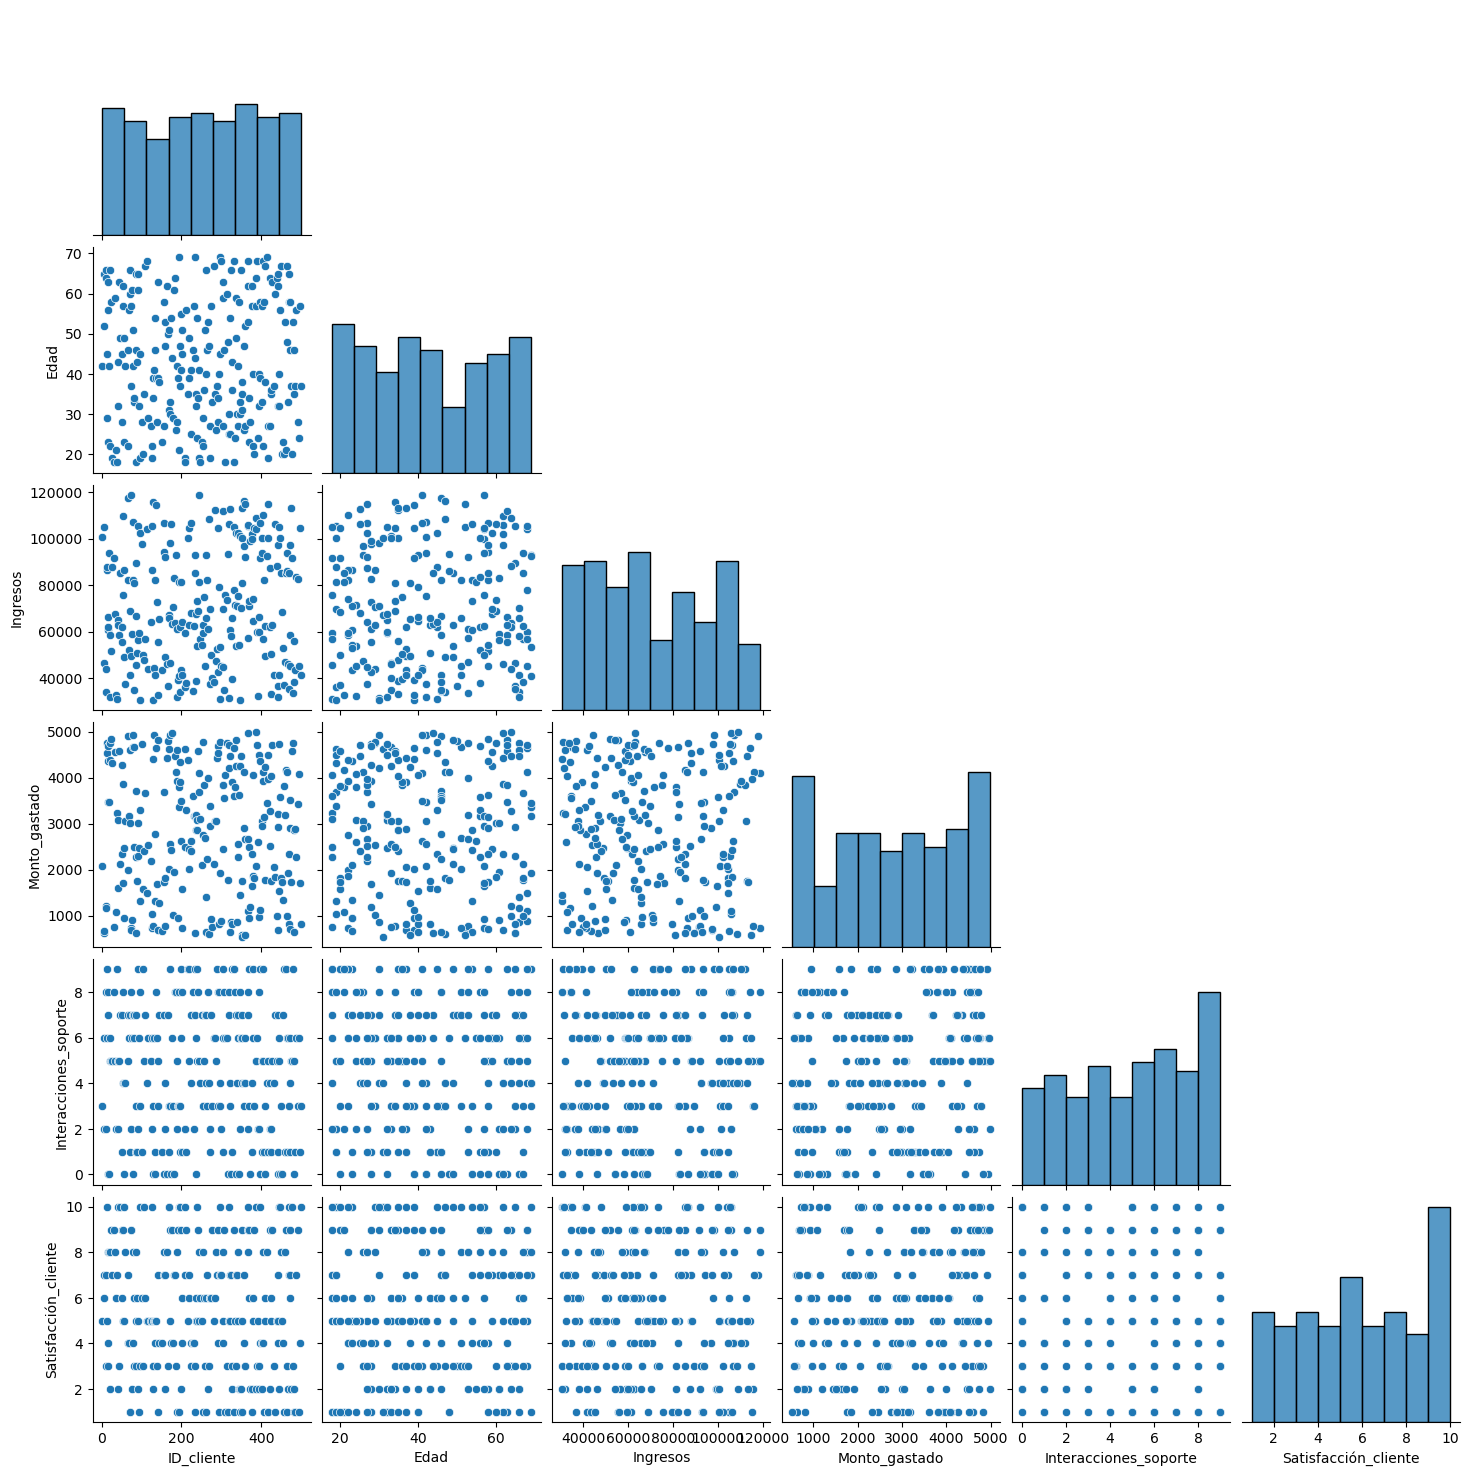

In [168]:
sns.pairplot(data=df_inactivos, corner = True);

### 7. Tendencias Temporales

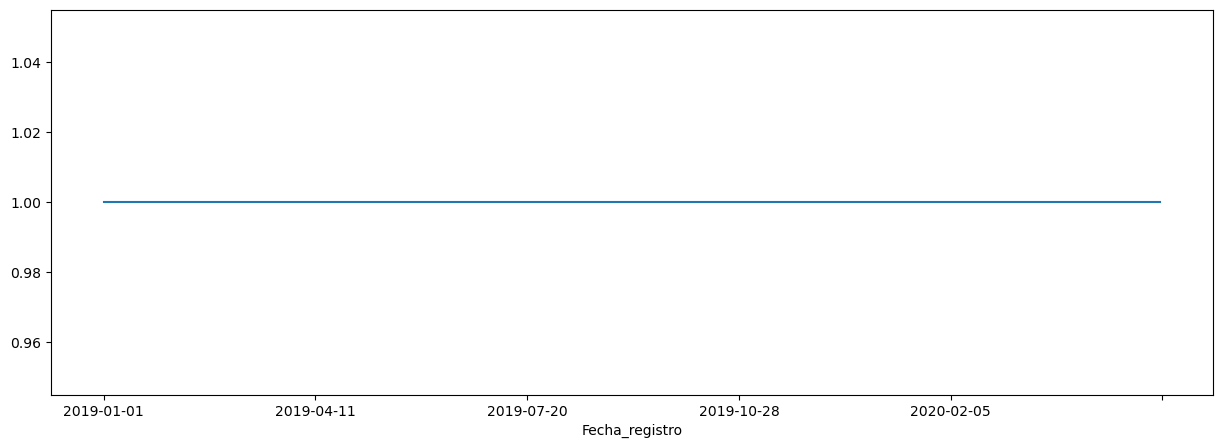

In [193]:
grafo = df.groupby("Fecha_registro")["ID_cliente"].count()
plt.figure(figsize=(15,5))
grafo.plot();

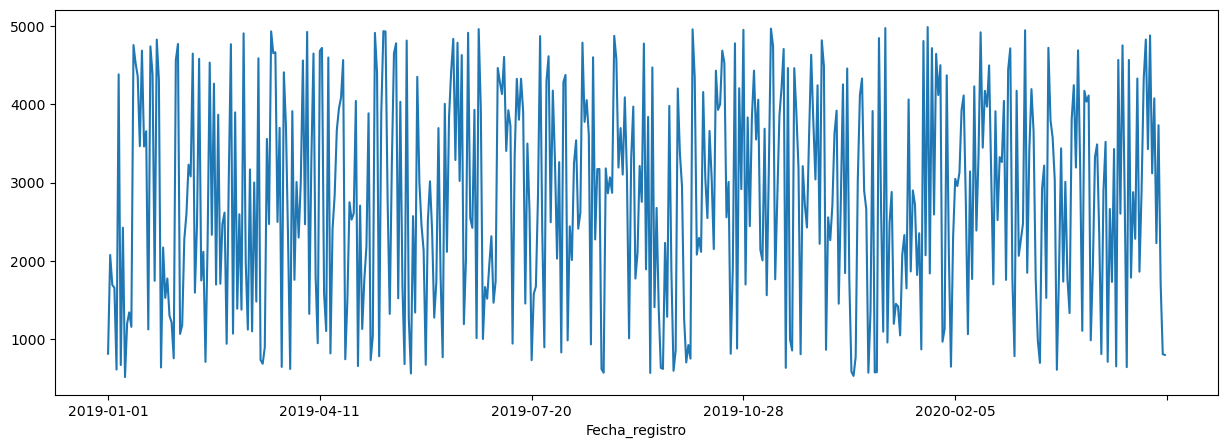

In [195]:
grafo = df.groupby("Fecha_registro")["Monto_gastado"].mean()
plt.figure(figsize=(15,5))
grafo.plot();

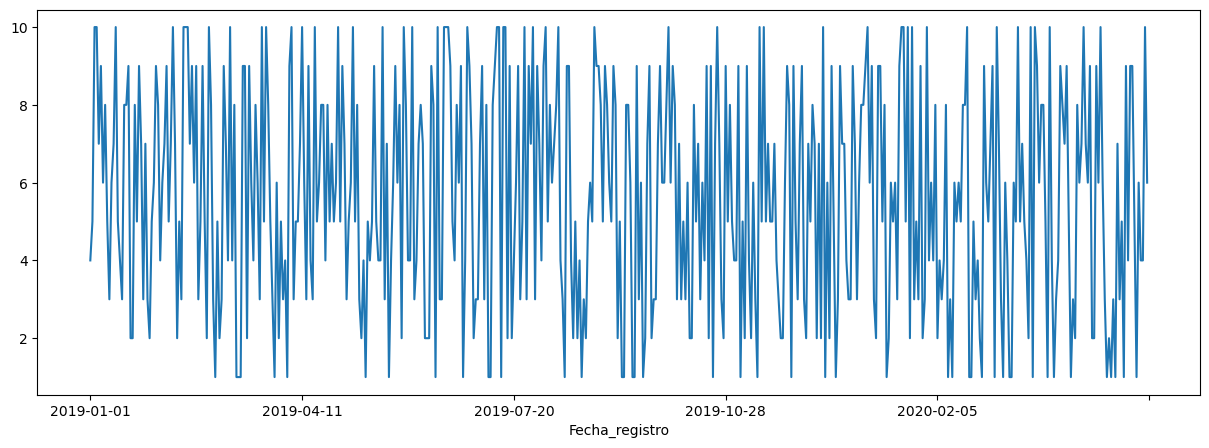

In [197]:
grafo = df.groupby("Fecha_registro")["Satisfacción_cliente"].mean()
plt.figure(figsize=(15,5))
grafo.plot();

In [211]:
df_inactivos["Satisfacción_cliente"].mean()

5.469135802469136

In [213]:
df_activos = df[df["Estado_cliente"] == "Activo"]


In [215]:
df_activos["Satisfacción_cliente"].mean()

5.778210116731517

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = df.groupby("Fecha_registro")["Monto_gastado"].mean()
result = seasonal_decompose(series, model='multiplicative', period=30)
result.plot()